In [1]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbp906\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sbp906\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sbp906\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sbp906\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sbp906\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
tourism_reviews=pd.read_csv('Tourism_data.csv', encoding='windows-1252')

In [7]:
tourism_reviews.describe()

,Hotel_ID,Review Date,Location,Hotel/Restaurant name,Review
count,2964,2964,2964,2964,2964
unique,2754,1078,4,30,2754
top,rn571875366,Reviewed 1 week ago,Kata Beach,The Tavern,"Such amazing pizza and pasta, the pizza was in..."
freq,7,50,2467,100,7


In [8]:
# Removing duplicates

tourism_reviews=tourism_reviews.drop_duplicates()

In [9]:
tourism_reviews.describe()

,Hotel_ID,Review Date,Location,Hotel/Restaurant name,Review
count,2754,2754,2754,2754,2754
unique,2754,1078,4,30,2754
top,rn580924528,Reviewed 1 week ago,Kata Beach,The Tavern,John and the girls make this bar the type of b...
freq,1,43,2287,100,1


In [10]:
#Applying the sentiment analyser to generate polarity scores
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
tourism_reviews['compound']=[sentiment.polarity_scores(i)['compound']for i in tourism_reviews['Review']]
tourism_reviews['neg']=[sentiment.polarity_scores(i)['neg']for i in tourism_reviews['Review']]
tourism_reviews['neu']=[sentiment.polarity_scores(i)['neu']for i in tourism_reviews['Review']]
tourism_reviews['pos']=[sentiment.polarity_scores(i)['pos']for i in tourism_reviews['Review']]

In [11]:

tourism_reviews[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,2754.000000,2754.000000,2754.000000,2754.000000
mean,0.658818,0.027976,0.737671,0.234357
std,0.426253,0.052185,0.123404,0.131928
min,-0.975700,0.000000,0.222000,0.000000
25%,0.592700,0.000000,0.654000,0.135000
50%,0.841600,0.000000,0.746000,0.225000
75%,0.924600,0.043000,0.825750,0.325000
max,0.993200,0.452000,1.000000,0.778000


In [12]:
tourism_reviews.head()

,Hotel_ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn580924528,Reviewed 3 days ago,Kata Beach,The Tavern,John and the girls make this bar the type of b...,0.9062,0.000,0.769,0.231
1,rn580696128,Reviewed 4 days ago,Kata Beach,The Tavern,I recently had the pleasure of attending at Th...,0.9268,0.026,0.693,0.280
2,rn579766211,Reviewed 1 week ago,Kata Beach,The Tavern,We have been to Kata a number of times and hav...,0.9181,0.000,0.731,0.269
3,rn579637841,Reviewed 1 week ago,Kata Beach,The Tavern,Sometimes you can revisit a place and it has c...,0.8807,0.000,0.797,0.203
4,rn579633253,Reviewed 1 week ago,Kata Beach,The Tavern,Absolutely brilliant pub that does amazing foo...,0.9815,0.000,0.418,0.582


<AxesSubplot:xlabel='compound', ylabel='Count'>

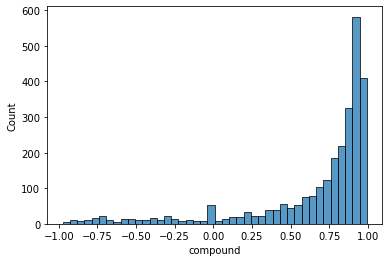

In [13]:
sns.histplot(tourism_reviews['compound'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

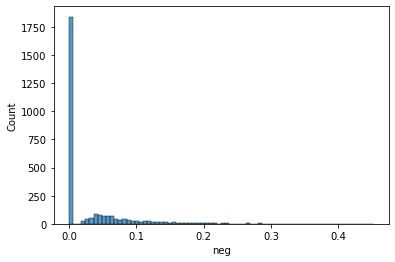

In [14]:
sns.histplot(tourism_reviews['neg'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

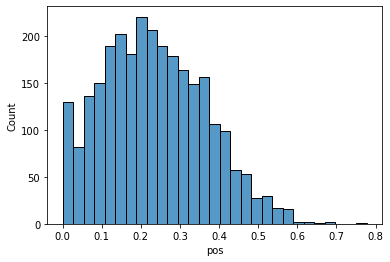

In [15]:
sns.histplot(tourism_reviews['pos'])

<AxesSubplot:xlabel='neu', ylabel='Count'>

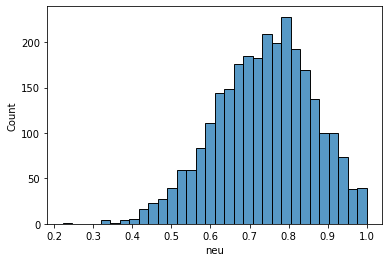

In [16]:
sns.histplot(tourism_reviews['neu'])

In [17]:
negative_reviews=(tourism_reviews['compound']<=0).groupby(tourism_reviews['Hotel/Restaurant name']).sum()

In [18]:
positive_reviews=(tourism_reviews['compound']>0).groupby(tourism_reviews['Hotel/Restaurant name']).sum()

In [19]:
negative_reviews

Hotel/Restaurant name
+39 Italian Street Food                 4
Baan Chom View                         20
Brasserie Phuket                        7
Buffalo Steak House - Kata Plaza       30
Burger House Kata Beach                 6
Catch Beach Club                        5
Coconut-garden                         14
Horn Grill Steak and Seafood           11
Kampong Kata Hill                       9
Kwong Shop Seafood                      6
Leonardo Davinci                        9
Madras Cafe                            12
Mom Tri's Kitchen at Villa Royale       5
New York Burger Co.                     4
On The Rocks - Marina Phuket Resort     9
Palm Square                             4
Pim's Place                            17
Red Corner                              3
Red Snapper                            21
Rugantino                               3
Sabai Corner                            3
Sawasdee Thai Cuisine                   5
Shakers                                 6
Sorrento piz

In [20]:
positive_reviews

Hotel/Restaurant name
+39 Italian Street Food                27
Baan Chom View                         80
Brasserie Phuket                       93
Buffalo Steak House - Kata Plaza       70
Burger House Kata Beach                94
Catch Beach Club                       95
Coconut-garden                         64
Horn Grill Steak and Seafood           89
Kampong Kata Hill                      91
Kwong Shop Seafood                     94
Leonardo Davinci                       91
Madras Cafe                            88
Mom Tri's Kitchen at Villa Royale      95
New York Burger Co.                    96
On The Rocks - Marina Phuket Resort    91
Palm Square                            96
Pim's Place                            83
Red Corner                             50
Red Snapper                            79
Rugantino                              51
Sabai Corner                           97
Sawasdee Thai Cuisine                  95
Shakers                                67
Sorrento piz

In [21]:
percent_negative=pd.DataFrame((tourism_reviews['compound']<=0).groupby(tourism_reviews['Hotel/Restaurant name']).sum()
/tourism_reviews['Hotel/Restaurant name'].groupby(tourism_reviews['Hotel/Restaurant name']).count()*100,columns=['% negative reviews']).sort_values(by='% negative reviews')

In [22]:
percent_negative.tail()

,% negative reviews
Hotel/Restaurant name,
Veranda,19.402985
Baan Chom View,20.000000
Red Snapper,21.000000
Sorrento pizzeria,24.000000
Buffalo Steak House - Kata Plaza,30.000000


In [23]:
percent_positive=pd.DataFrame((tourism_reviews['compound']>0).groupby(tourism_reviews['Hotel/Restaurant name']).sum()
/tourism_reviews['Hotel/Restaurant name'].groupby(tourism_reviews['Hotel/Restaurant name']).count()*100,columns=['% positive reviews']).sort_values(by='% positive reviews')

In [24]:
percent_positive

,% positive reviews
Hotel/Restaurant name,
Buffalo Steak House - Kata Plaza,70.000000
Sorrento pizzeria,76.000000
Red Snapper,79.000000
Baan Chom View,80.000000
Veranda,80.597015
Coconut-garden,82.051282
Pim's Place,83.000000
+39 Italian Street Food,87.096774
Madras Cafe,88.000000


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

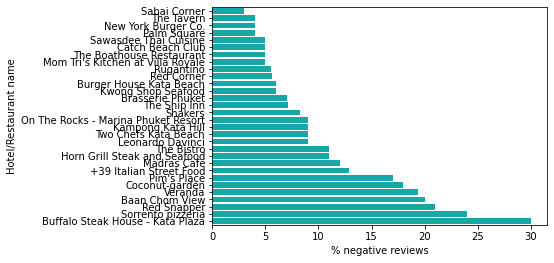

In [25]:
sns.barplot(data=percent_negative, x='% negative reviews',y=percent_negative.index,color='c')

In [26]:
def preprocess_text(text):
  tokenized_document =nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens =[word.lower() for word in tokenized_document if word.lower() not in stop_words]
  stemmed_text=[nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [27]:
stop_words = nltk.corpus.stopwords.words('english')

In [28]:

tourism_reviews['processed_review'] = tourism_reviews['Review'].apply(preprocess_text)
tourism_reviews_positive_subset=tourism_reviews.loc[(tourism_reviews['Hotel/Restaurant name']=='Buffalo Steak House - Kata Plaza')
&(tourism_reviews['compound']>0),:]
tourism_reviews_negative_subset=tourism_reviews.loc[(tourism_reviews['Hotel/Restaurant name']=='Buffalo Steak House - Kata Plaza')
&(tourism_reviews['compound']<0),:]
tourism_reviews_positive_subset.head()

,Hotel_ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
2566,rn580506699,Reviewed 5 days ago,Kata Beach,Buffalo Steak House - Kata Plaza,My husband & I visited 4 years ago and had the...,0.6369,0.000,0.907,0.093,"[husband, visit, 4, year, ago, best, thai, bbq..."
2567,rn572627186,"Reviewed April 11, 2018",Kata Beach,Buffalo Steak House - Kata Plaza,Always come here for delicious fillet steaks c...,0.9153,0.000,0.597,0.403,"[alway, come, delici, fillet, steak, cook, exa..."
2568,rn571791160,"Reviewed April 7, 2018",Kata Beach,Buffalo Steak House - Kata Plaza,After a walk along the street we finally decid...,0.5255,0.113,0.729,0.158,"[walk, along, street, final, decid, upon, stea..."
2570,rn565433823,"Reviewed March 9, 2018",Kata Beach,Buffalo Steak House - Kata Plaza,House vine is good!\r\nFood average.\r\nWaterm...,0.8114,0.113,0.594,0.293,"[hous, vine, good, food, averag, watermelon, f..."
2571,rn560613804,"Reviewed February 15, 2018",Kata Beach,Buffalo Steak House - Kata Plaza,"Good food, wine and beer\r\nTender meet\r\nChi...",0.9217,0.000,0.496,0.504,"[good, food, wine, beer, tender, meet, childre..."


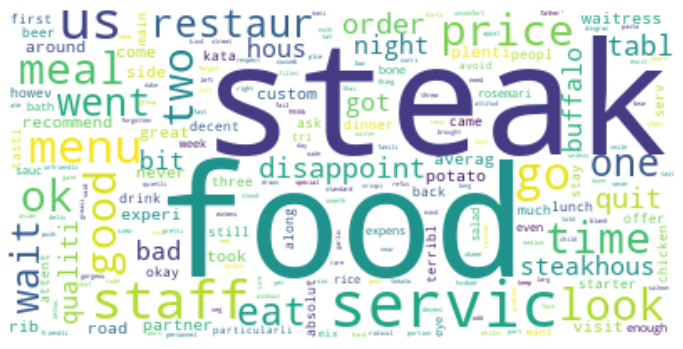

In [29]:
from nltk.corpus.reader import Review
neg_tokens=[word for review in tourism_reviews_negative_subset['processed_review'] for word in review]
wordcloud =WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

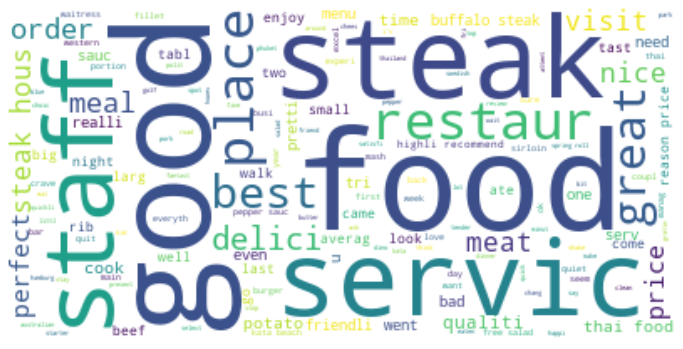

In [30]:
pos_tokens=[word for review in tourism_reviews_positive_subset['processed_review'] for word in review]
wordcloud =WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
!pip install nltk.probability

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement nltk.probability (from versions: none)
ERROR: No matching distribution found for nltk.probability


In [32]:
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

   food   steak    good  servic   staff restaur   place   great   price    best 
     48      42      40      23      19      17      17      13      13      12 


In [33]:
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

 steak   food servic     us  staff     go   menu     ok   good   meal 
    15     15     12      8      8      6      6      5      5      5 


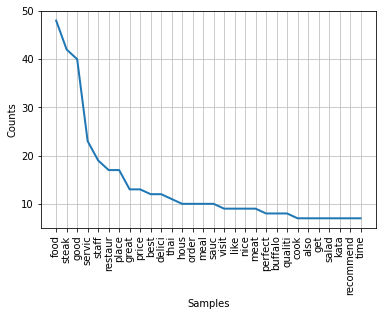

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
pos_freqdist.plot(30)

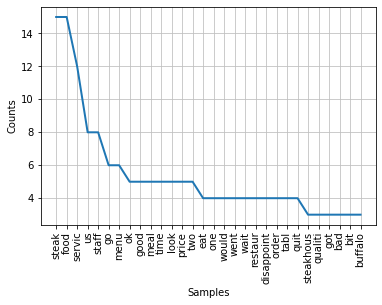

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
neg_freqdist.plot(30)